In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
npoints = 100
signal = np.random.normal(loc=0.0, scale=1.0, size=npoints)
foregrounds = (np.arange(npoints)+2000)**-.8
#foregrounds[:] =1
foregrounds = foregrounds*1e3 / np.mean(signal)

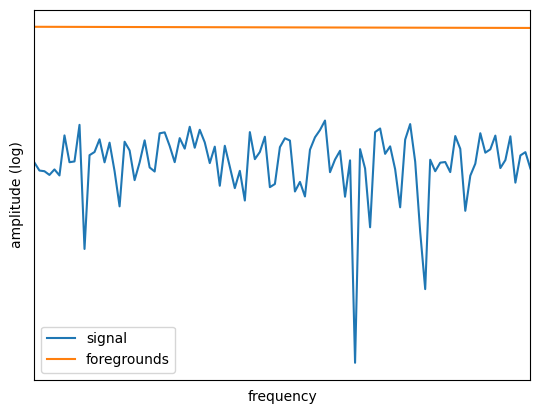

In [108]:
plt.plot(signal**2., label="signal")
plt.plot(foregrounds**2., label="foregrounds")
plt.yscale("log")
plt.xlim([0,99])
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.xlabel("frequency")
plt.ylabel("amplitude (log)")
plt.legend()
plt.show()

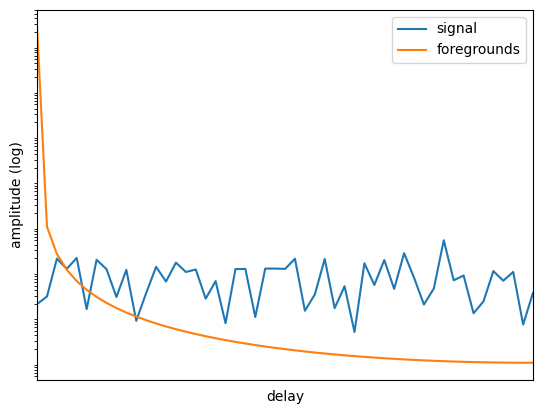

In [110]:
plt.plot(np.abs(np.fft.fft(signal))**2., label="signal")
plt.plot(np.abs(np.fft.fft(foregrounds))**2., label="foregrounds")
plt.yscale("log")
plt.xlim([0,50])
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.xlabel("delay")
plt.ylabel("amplitude (log)")
plt.legend()
plt.show()

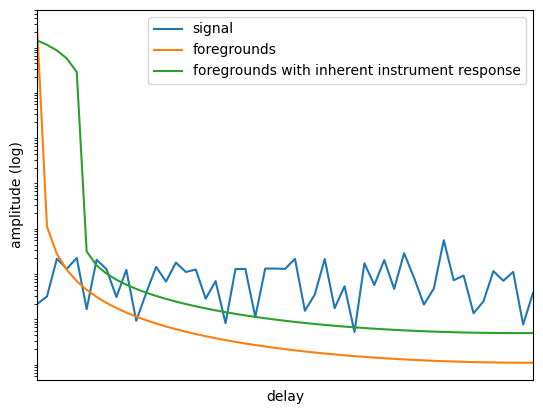

In [112]:
wedge_extent = 10
instrument_kernel = np.arange(wedge_extent)[::-1]/wedge_extent
foreground_and_wedge = np.convolve(np.abs(np.fft.fft(foregrounds))**2., instrument_kernel, mode="same")
plt.plot(np.abs(np.fft.fft(signal))**2., label="signal")
plt.plot(np.abs(np.fft.fft(foregrounds))**2., label="foregrounds")
plt.plot(foreground_and_wedge, label="foregrounds with inherent instrument response")
plt.yscale("log")
plt.xlim([0,50])
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.xlabel("delay")
plt.ylabel("amplitude (log)")
plt.legend()
plt.show()

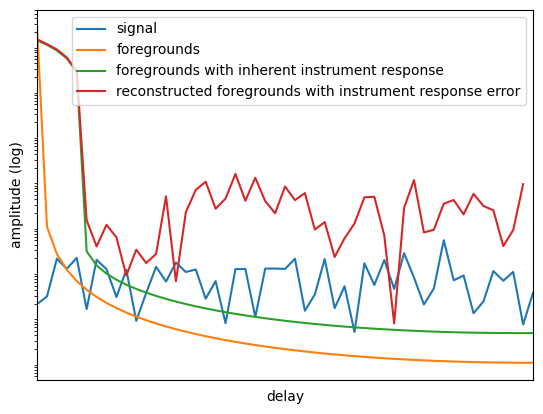

In [115]:
foreground_with_cal = np.zeros(50)
cal_noise = np.random.normal(loc=0.0, scale=0.01, size=50)
for i in range(len(foreground_with_cal)):
    foreground_with_cal[i] = (np.sqrt(foreground_and_wedge[i]) + np.sum(np.roll(cal_noise, i)*np.sqrt(foreground_and_wedge[0:50])))**2.
plt.plot(np.abs(np.fft.fft(signal))**2., label="signal")
plt.plot(np.abs(np.fft.fft(foregrounds))**2., label="foregrounds")
plt.plot(foreground_and_wedge, label="foregrounds with inherent instrument response")
plt.plot(foreground_with_cal, label="reconstructed foregrounds with instrument response error")
plt.yscale("log")
plt.xlim([0,50])
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.xlabel("delay")
plt.ylabel("amplitude (log)")
plt.legend()
plt.show()